In [194]:
from konlpy.tag import Okt
import pandas as pd
import json
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input,dash_table
import plotly.graph_objects as go


plt.rc('font', family='Malgun Gothic')  #고딕체 설정
mpl.rcParams['axes.unicode_minus'] = False


In [195]:
milk=pd.read_csv('밀크티 감정분석(수정).csv')

In [196]:
for i in range(1408):
    if milk['감정분석'][i] >=0:
        milk['감정분석'][i] = '긍정'
    else:
        milk['감정분석'][i] = '부정'

C:\Users\user\AppData\Local\Temp\ipykernel_17872\1656668744.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
milk

,index,제목,연수명,별점,작성일,내용,처리 후 내용,감정분석
0,0,독서교육을 해보고 싶어지게 만드는 연수!!!,같이 읽고 함께 나누는 독서수업방법,5,2023.07.28,아이를 키우며 그림책과 동화책에 관심을 갖게 되었다.\n감동적이고 재미있는 책들을 ...,아이 키우며 그림책 동화책 관심 갖게 되었다 감동 재미있는 보면서 그냥 읽기에는 아...,긍정적
1,1,솔직히 말씀드리자면 내용도 올드하고 음향은 정말 듣기 힘들었습니다.,강의의 품격,3,2023.07.27,비추천합니다. 새로울 것 없는 내용과 화질 안 좋은 것은 참겠는데 음향은 정말 괴로...,비추 천합니다 새로울 없는 내용 화질 좋은 참겠는데 음향 정말 괴로웠어요,긍정적
2,2,역사로 현재를 묻다,신병주 교수의 왕으로 산다는 것,5,2023.07.27,조선왕들의 역사를 통하여 현재를 묻는 거울이 된다.\n균형있는 강의 내용과 치우침이...,선왕 역사 하여 현재 묻는 거울 균형 있는 내용 치우침이 없는 중립 관점 역사 공부...,긍정적
3,3,잘못 알고 있던 상식을 제대로 알 수 있는 계기가 되었어요,메디컬 콘서트 1탄 - 현대인의 만성 질병,5,2023.07.27,잘못 알고 있던 의학 상식들을 제대로 알 수 있어 좋았어요,잘못 의학 상식 제대로 있어 좋았어요,긍정적
4,4,연주도 하고 힐링도 하고,정훈쌤의 뚝딱 칼림바,5,2023.07.26,칼림바 연수에서 칼림바와 악보를 선물로 받았습니다. 학생들이 음악 강사와 칼림바 수...,칼림바 칼림바 악보 선물 받았습니다 학생 음악 강사 칼림바 생각 없이 교실 앉아 있...,긍정적
...,...,...,...,...,...,...,...,...
1403,1403,잘 들었습니다.,한 번에 끝내는 법정연수 1,5,2022.01.04,감사합니다.,감사합니다,긍정적
1404,1404,강사분이 적극적으로 자세히 설명하는 부분이 너무 좋음,그림검사와 다양한 기법으로 만나는 미술치료,5,2022.01.03,강사분이 적극적으로 자세히 설명하는 부분이 너무 좋음,강사 적극 자세히 설명 하는 부분 너무 좋음,긍정적
1405,1405,한번에 끝내는 법정연수 1,한 번에 끝내는 법정연수 1,5,2022.01.03,유익한 연수였습니다. 잘 들었습니다.,유익한 였습니다 들었습니다,긍정적
1406,1406,정말 추천해요~,당장 따라 할 수 있는 사계절 학급운영+이벤트,5,2022.01.03,담임 경력이 짧은데 내년 학년 아직 결정도 안 된 상태에서 내년 걱정만으로 겨울방학...,담임 경력 짧은데 내년 학년 아직 결정 상태 내년 걱정 만으로 겨울방학 편하지 않았...,긍정적


# 아이스크림

In [198]:
ice=pd.read_csv('아이스크림 감정분석(수정).csv')

In [199]:
for i in range(len(ice['내용'])):
    if ice['감정분석'][i] >=0:
        ice['감정분석'][i] = '긍정적'
    else:
        ice['감정분석'][i] = '부정적'

C:\Users\user\AppData\Local\Temp\ipykernel_17872\2196940890.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
ice

,index,제목,연수명,별점,작성일,내용,처리 후 내용,감정분석
0,0,다양한 AI 프로그램을 알 수 있었습니다. ; ),"챗GPT 융합교육 가이드, 인공지능(AI) 챗봇 수업",5,2023.07.28,챗GPT가 무엇인지는 대충 알고 있었는데\n수업에 어떻게 활용하면 좋을까?\n학생들...,GPT 무엇 지는 대충 있었는데 어떻게 활용 하면 좋을까 학생 어떻게 접근 하면 좋...,긍정적
1,1,너무 유익한 강의!,유초등을 사로잡는 감동의 그림책 놀이수업,5,2023.07.28,너무 유익한 강의였습니다. 감사합니다^^,너무 유익한 였습니다 감사합니다 ^^,긍정적
2,2,알차네요,전문가가 알려주는 창의 영재교육의 비법,5,2023.07.28,무엇보다도 빨리들을 수 있어 좋습니다,무엇 보다도 빨리 들을 있어 좋습니다,긍정적
3,3,"챗GPT 융합교육 가이드, 인공지능(AI) 챗봇 수업 연수 후기","챗GPT 융합교육 가이드, 인공지능(AI) 챗봇 수업",5,2023.07.27,제목을 보고 평소에 많이 들어본 것이라 어떻게 접목을 할 수 있을까 고민을 하다 들...,제목 보고 평소 많이 들어 이라 어떻게 접목 있을까 고민 하다 들었는데 역시 괜찮았...,긍정적
4,4,과정중심 평가에 대해 알게되었어요,수업과 성장을 돕는 과정중심평가_초등 기초,5,2023.07.27,과정중심 평가에 대해 조금 더 알게되었어요,과정 중심 평가 대해 조금 되었어요,부정적
...,...,...,...,...,...,...,...,...
12035,12035,헌 단계 성장하도록 해 주는 연수입니다.,"미래인재의 역량을 키운다, 미래교육 20분",5,2022.01.02,저는 매일매일 학교 업무를 하면서 바쁜 일상을 보냅니다. 코로나시대 전교생의 안전한...,매일 학교 업무 하면서 바쁜 일상 보냅니다 시대 전교생 안전한 등교 교사 업무 지원...,긍정적
12036,12036,이런 연수가 더 많아져야 합니다.,유럽여행을 위한 미술 이야기,5,2022.01.02,유럽의 미술의 역사를 여러 전문 강사들이 설명하는 강의가 재미있었습니다.\n다른 원...,유럽 미술 역사 여러 전문 강사 설명 하는 재미있었습니다 다른 원격 에서는 강사 이...,긍정적
12037,12037,연수 듣기도 편하고 수업에 활용할 수 있는 연수~,"쉽게 쓰고, 소품으로 완성하는 캘리그래피",5,2022.01.01,급히 학점을 채우기 위해 듣게 된 연수인데 생각보다 버리는 과정 없이 귀에 쏙쏙 들...,급히 학점 채우기 듣게 인데 생각 보다 버리는 과정 없이 쏙쏙 들어온 였습니다 아이...,부정적
12038,12038,외국어와 비교함으로써 문화의 차이를 이해할 수 있었습니다.,한국어교원양성과정 Ⅲ,5,2022.01.01,한국어에서 너무나 익숙한 발음들을 외국인 입장에서는 잘 들리지 않는다는게 신기했습니...,한국어 너무나 익숙한 발음 외국인 입장 에서는 들리지 않는다는게 신기했습니다 또한 ...,부정적


# 시각화

## 사이트별 긍부정 비율비교 

### 밀크티 긍정 부정 건수

In [201]:
긍정_count=milk[milk['감정분석']=='긍정적']['감정분석'].count()
부정_count = milk[milk['감정분석']=='부정적']['감정분석'].count()

In [202]:
list1 = []

In [203]:
list1.append(['밀크티',긍정_count, 부정_count, 긍정_count + 부정_count])

In [204]:
df1=pd.DataFrame(list1)

### 아이스크림 긍정 부정 건수

In [205]:
긍정_count_ice=ice[ice['감정분석']=='긍정적']['감정분석'].count()
부정_count_ice = ice[ice['감정분석']=='부정적']['감정분석'].count()

In [206]:
list1.append(['아이스크림',긍정_count_ice, 부정_count_ice, 긍정_count_ice + 부정_count_ice])

In [207]:
df1=pd.DataFrame(list1)
df1.columns=['구분','긍정건수', '부정건수', '전체건수']
df1

,구분,긍정건수,부정건수,전체건수
0,밀크티,1131,277,1408
1,아이스크림,9396,2644,12040


In [229]:
# 밀크티 긍부정 비교
fig = px.pie(values=[df1['긍정건수'][0],df1['부정건수'][0]], names=['긍정','부정'])

In [230]:
# 아이스크림 긍부정 비교
fig = px.pie(values=(df1['긍정건수'][1],df1['부정건수'][1]), names=['긍정','부정'])


## 워드클라우드

### 밀크티 워드 클라우드

In [210]:
milk_word = milk['처리 후 내용'][0]
for i in range(1406):
    try:
        milk_word = milk_word + milk['처리 후 내용'][i+1]
    except:
        continue

In [211]:
okt = Okt()
nouns = okt.nouns(milk_word) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

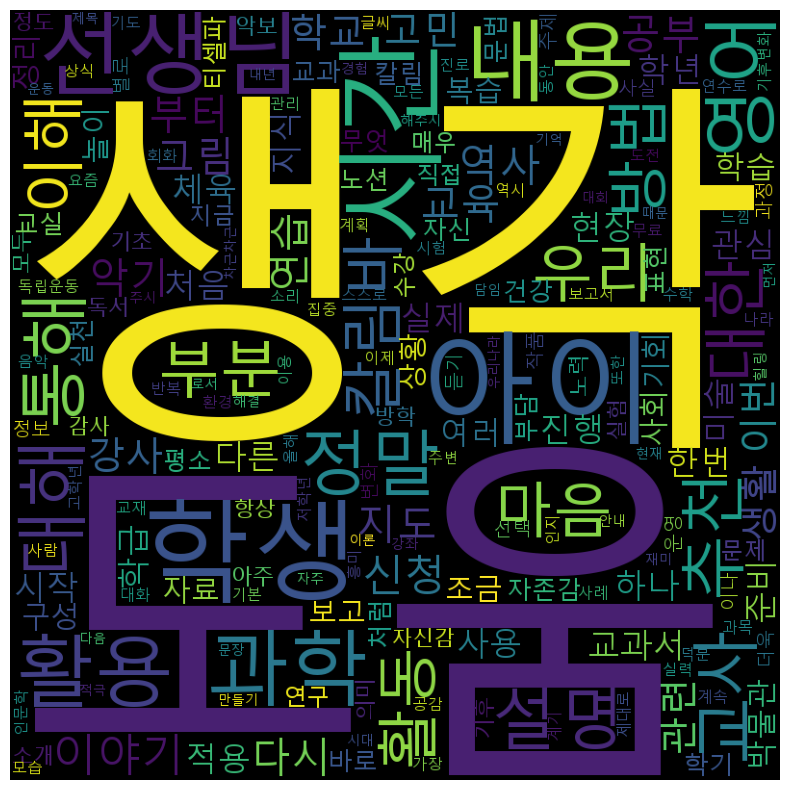

In [212]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize= (10,10))
plt.axis('off')
plt.imshow(gen)

### 아이스크림 워드 클라우드

In [213]:
ice_word = ice['처리 후 내용'][0]
for i in range(12039):
    try:
        ice_word = ice_word + ice['처리 후 내용'][i+1]
    except:
        continue

In [214]:
okt_ice = Okt()
nouns_ice = okt_ice.nouns(ice_word) # 명사만 추출
words_ice = [n for n in nouns_ice if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c_ice = Counter(words_ice)

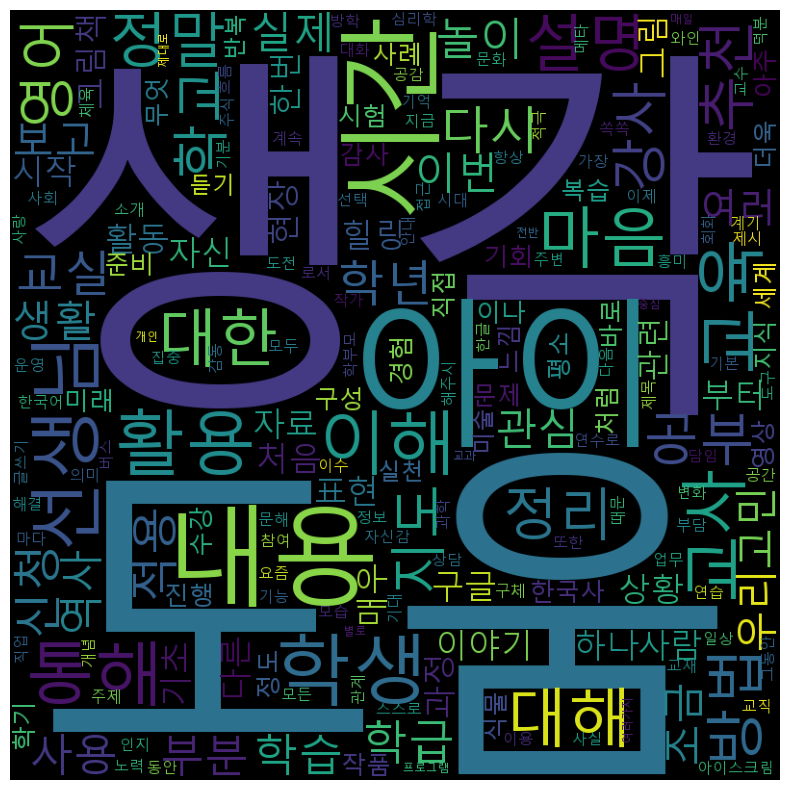

In [215]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_ice)
plt.figure(figsize= (10,10))
plt.axis('off')
plt.imshow(gen)

## 월별 긍부정 리뷰 건수

In [216]:
milk_cou = milk.copy()
ice_cou = ice.copy()

In [217]:
# 작성일중 연도와 월을 구분한다.
milk_cou['작성 연도'] = milk_cou['작성일'].apply(lambda x: x.split('.')[0])
milk_cou['작성 월'] = milk_cou['작성일'].apply(lambda x: x.split('.')[1])

ice_cou['작성 연도'] = ice_cou['작성일'].apply(lambda x: x.split('.')[0])
ice_cou['작성 월'] = ice_cou['작성일'].apply(lambda x: x.split('.')[1])

In [218]:
# 특정월의 
milk_23=milk_cou[milk_cou['작성 연도']=='2023']
milk_22=milk_cou[milk_cou['작성 연도']=='2022']

ice_23=ice_cou[ice_cou['작성 연도']== '2023']
ice_22=ice_cou[ice_cou['작성 연도']== '2022']

In [219]:
milk_23_T=pd.DataFrame(milk_23[milk_23['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_23_F=pd.DataFrame(milk_23[milk_23['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_22_T=pd.DataFrame(milk_22[milk_22['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

milk_22_F=pd.DataFrame(milk_22[milk_22['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])


In [220]:
ice_23_T=pd.DataFrame(ice_23[ice_23['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_23_F=pd.DataFrame(ice_23[ice_23['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_22_T=pd.DataFrame(ice_22[ice_22['감정분석']=='긍정적'].groupby(by='작성 월').count().loc[:,'감정분석'])

ice_22_F=pd.DataFrame(ice_22[ice_22['감정분석']=='부정적'].groupby(by='작성 월').count().loc[:,'감정분석'])


In [221]:
result_cou = pd.concat([milk_23_T,milk_23_F,milk_22_T,milk_22_F,
                         ice_23_T,ice_23_F,ice_22_T,ice_22_F],axis=1)

In [222]:
result_cou

,감정분석,감정분석,감정분석,감정분석,감정분석,감정분석,감정분석,감정분석
작성 월,,,,,,,,
01,43.0,13.0,36,8,434.0,119.0,564,151
02,14.0,7.0,19,5,205.0,51.0,286,89
03,26.0,9.0,20,6,260.0,71.0,234,67
04,80.0,9.0,45,3,446.0,133.0,518,141
05,53.0,13.0,53,9,490.0,138.0,533,135
06,51.0,17.0,29,5,377.0,111.0,508,135
07,46.0,15.0,96,27,371.0,114.0,491,194
08,NaN,NaN,84,28,NaN,NaN,727,210
09,NaN,NaN,43,6,NaN,NaN,460,121


In [223]:
result_cou.columns=['밀크티 23 긍정','밀크티 23 부정','밀크티 22 긍정','밀크티 22 부정',
                    '아이스 23 긍정','아이스 23 부정','아이스 22 긍정','아이스 22 부정']

In [224]:
result_cou.reset_index(drop=False, inplace = True)

In [225]:
result_cou.fillna(0, inplace=True)

In [226]:
result_cou

,작성 월,밀크티 23 긍정,밀크티 23 부정,밀크티 22 긍정,밀크티 22 부정,아이스 23 긍정,아이스 23 부정,아이스 22 긍정,아이스 22 부정
0,01,43.0,13.0,36,8,434.0,119.0,564,151
1,02,14.0,7.0,19,5,205.0,51.0,286,89
2,03,26.0,9.0,20,6,260.0,71.0,234,67
3,04,80.0,9.0,45,3,446.0,133.0,518,141
4,05,53.0,13.0,53,9,490.0,138.0,533,135
5,06,51.0,17.0,29,5,377.0,111.0,508,135
6,07,46.0,15.0,96,27,371.0,114.0,491,194
7,08,0.0,0.0,84,28,0.0,0.0,727,210
8,09,0.0,0.0,43,6,0.0,0.0,460,121
9,10,0.0,0.0,100,21,0.0,0.0,633,175


# 대시보드

In [228]:
app = Dash(__name__)


fig1 = px.pie(values=[df1['긍정건수'][0],df1['부정건수'][0]], names=['긍정','부정'])
fig2 = px.pie(values=[df1['긍정건수'][1],df1['부정건수'][1]], names=['긍정','부정'])

fig = go.Figure()
def fig_name(name_n, i,color_A):
    x_A=result_cou['작성 월'].values.tolist()
    y_A = result_cou[result_cou.columns[i]].values.tolist()   
    fig.add_trace(
    go.Bar(name = name_n, x= x_A, y=y_A,marker = {'color':color_A})
    )


fig_name('밀크 23 긍정',1,'#3274A1')# 밀크 23 긍정
fig_name('밀크 23 부정',2,'#E1912C')# '밀크 23 부정'
fig_name('밀크 22 긍정',3,'#3274A1')# '밀크 22 긍정'
fig_name('밀크 22 부정',4,'#E1912C')# '밀크 22 부정'
fig_name('아이스크림 23 긍정',5,'#3F48CC')# '아이스크림 23 긍정'
fig_name('아이스크림 23 부정',6,'#EB3324')# '아이스크림 23 부정'
fig_name('아이스크림 22 긍정',7,'#3F48CC')# '아이스크림 22 긍정'
fig_name('아이스크림 22 부정',8,'#EB3324')# '아이스크림 22 부정'

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction = "down",
            buttons=list([dict(label="밀크티 23년",
                                 method="update",
                                 args=[{"visible": [True, True, False,False,False,False,False,False]},
                                       {"title": "밀크티 23년"}]),
                            dict(label="밀크티 22년",
                                 method="update",
                                 args=[{"visible": [False, False, True, True, False, False,False, False]},
                                       {"title": "밀크티 22년",
                                        }]),
                            dict(label="아이스크림 23년",
                                 method="update",
                                 args=[{"visible": [False, False, False, False, True, True,False,False]},
                                       {"title": "아이스크림 23년",
                                        }]),
                            dict(label="아이스크림 22년",
                                 method="update",
                                 args=[{"visible": [False, False, False, False, False, False,True, True]},
                                       {"title": "아이스크림 22년",
                                        }]),
                ]),
      

        ),
    ]
)



app.layout = html.Div([
    html.Div([
        html.Div([
            html.H2(children='티셀파 리뷰 긍부정 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig1),],style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    
        
        html.Div([
            html.H2(children='아이스크림 리뷰 긍부정 비교', style={'textAlign':'center'}),
            dcc.Graph(figure=fig2),], style={'width': '49%', 'float': 'right', 'display': 'inline-block'}),
      
        html.Div([
            dash_table.DataTable(df1.to_dict('records'),[{"name" : i ,"id" : i}for i in df1.columns])]),
      
        html.Div([
            html.H1(children='월별 긍정 부정 추이', style={'textAlign':'center'}),
            dcc.Graph(figure=fig)], style={'width': '100%',  'display': 'inline-block'})

        
           ])
])






if __name__ == '__main__':  
    app.run_server(mode = 'external', port=8082, debug=True)      
    
    
    
    
  